In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None,'display.max_columns',None)
sns.set()

In [38]:
de = pd.read_csv('Results/result-de.csv',index_col=0)
current = pd.read_csv('Results/result-CR.csv',index_col=0)
roi = pd.read_csv('Results/result-roi.csv',index_col=0)
revenue = pd.read_csv('Results/Rev.csv',index_col=0)
eps = pd.read_csv('Results/eps.csv',index_col=0)
bvps = pd.read_csv('Results/bvps.csv',index_col=0)
fcf = pd.read_csv('Results/fcf.csv',index_col=0)

In [39]:
data = pd.concat([de,current,roi,revenue,eps,bvps,fcf],axis=1,keys=['DE','Current','ROI','Revenue','EPS','BVPS','FCF'])
#data.columns=['DE_ratio_year','DE_ratio_mean','DE_ratio_max','Current_results']
data.head()

DE                            Current        ROI          \
     result_year result_mean result_max     results       Mean results   
AAPL        True        True       True  Last 5Y OK  39.580667    True   
MSFT        True        True       True  Last 5Y OK  28.740465    True   
AMZN        True        True       True  Last 2Y OK  13.553953    True   
GOOG        True        True       True  Last 5Y OK  19.905789    True   
FB          True        True       True  Last 5Y OK  66.800714    True   

       Revenue                                     EPS                      \
      10Y CAGR   5Y CAGR   3Y CAGR   1Y CAGR  10Y CAGR   5Y CAGR   3Y CAGR   
AAPL  0.197500  0.073149  0.064581 -0.020411  0.249570  0.130280  0.126067   
MSFT  0.079727  0.077033  0.113485  0.140295  0.120633  0.139827  0.254980   
AMZN  0.276040  0.258135  0.272985  0.204541  0.274174       NaN  0.674584   
GOOG  0.212071  0.196510  0.214860  0.183001  0.170196  0.190352  0.208543   
FB    0.569994  0.414929  0.367618  0.266109  0.516426  0.423520  0.225919   

                    BVPS                                     FCF            \
       1Y CAGR  10Y CAGR   5Y CAGR   3Y CAGR   1Y CAGR  10Y CAGR   5Y CAGR   
AAPL -0.003356  0.075461 -0.032367 -0.100551 -0.243615  0.206457  0.032706   
MSFT  1.375587  0.115237  0.053339  0.070346  0.174226  0.091656  0.072066   
AMZN  0.142502  0.277432  0.200590  0.263726  0.444376  0.243557  0.676663   
GOOG  0.124943       NaN  0.063947  0.067994  0.113328  0.137953  0.207503   
FB   -0.150594       NaN  0.108702  0.109959  0.254098  0.675028  0.310155   

                          
       3Y CAGR   1Y CAGR  
AAPL  0.032568 -0.081487  
MSFT  0.152672  0.186283  
AMZN  0.351304  0.331186  
GOOG  0.059195  0.356517  
FB    0.222257  0.381079

### Price - Calculate A fair Value
----
#### How can we obtain the price?

To acchive the fair value, we start with the Current EPS, then calculate the Future EPS and Future P/E. Finally, we go back to the present and get the price, price that will be compare with the market value.
$$
Current-EPS ---EPS-Growth----> Future-EPS
$$
$$
Price <-----Rate-of-Return------- Future-P/E
$$

### Four Values:

1. Current EPS is reported.
2. EPS Growth Rate = BVPS Growth Rate.
3. Future EPS = min {2x Growth Rate, avg. hist. P/E}
4. Return to Investment (ROI) = 15%

### P/E Ratio = Price / EPS

High P/E Ratio = the business is expected to grow fast.

In [40]:
pe = pd.read_csv('PyFinance/04 - Intrinsic Value/50-pe-ratio.csv',index_col=0)

pe.index = pd.to_datetime(pe.index)
pe.sort_index(ascending=False,inplace=True)
pe.head()

,AAPL,MSFT,AMZN,GOOG,FB,TSLA,BRK.A,V,JNJ,WMT,JPM,MA,PG,UNH,DIS,NVDA,HD,PYPL,BAC,VZ,ADBE,CMCSA,NFLX,KO,NKE,MRK,PEP,T,PFE,INTC,CRM,ABT,ORCL,ABBV,CSCO,TMO,AVGO,XOM,ACN,QCOM,COST,CVX,LLY,MCD,DHR,MDT,NEE,TXN,HON,UPS
2021-01-08,40.51,35.48,93.2,34.92,30.47,1767.11,15.60,44.15,25.16,21.19,17.78,53.05,26.54,20.87,0.0,86.92,23.28,91.49,16.10,13.11,78.24,23.11,82.32,26.60,83.63,18.37,28.55,19.09,23.95,10.13,57.97,59.05,19.21,22.68,18.32,41.99,70.85,58.28,45.54,34.58,37.98,0.0,27.19,32.96,49.29,45.69,40.87,32.36,30.13,30.11
2020-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.17,NaN,NaN,NaN,76.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.42,NaN,NaN,NaN,NaN,NaN,42.95,NaN,39.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.98,NaN,NaN,NaN,NaN,NaN,82.03,22.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.64,NaN,NaN,NaN,14.47,NaN,55.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.19,NaN,NaN,NaN,NaN
2020-09-30,35.46,33.89,92.2,28.40,29.83,861.47,14.18,40.91,23.25,NaN,12.38,50.58,26.43,17.84,0.0,NaN,NaN,74.35,11.85,13.21,NaN,20.54,80.65,25.51,NaN,18.20,27.25,18.10,22.22,10.08,NaN,57.39,NaN,18.27,NaN,36.17,NaN,43.00,NaN,25.87,NaN,0.0,24.06,33.31,43.55,NaN,34.80,26.81,23.51,31.48
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.66,NaN,NaN,NaN,66.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.80,NaN,NaN,NaN,NaN,NaN,30.29,NaN,37.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
pe=pe.resample('Q',convention='end').agg('mean')

pe = pe.loc['2010-01-01':]

In [42]:
pe=pe.transpose()
pe['Mean'] = pe.mean(axis=1)
pe.head()

,2010-03-31 00:00:00,2010-06-30 00:00:00,2010-09-30 00:00:00,2010-12-31 00:00:00,2011-03-31 00:00:00,2011-06-30 00:00:00,2011-09-30 00:00:00,2011-12-31 00:00:00,2012-03-31 00:00:00,2012-06-30 00:00:00,2012-09-30 00:00:00,2012-12-31 00:00:00,2013-03-31 00:00:00,2013-06-30 00:00:00,2013-09-30 00:00:00,2013-12-31 00:00:00,2014-03-31 00:00:00,2014-06-30 00:00:00,2014-09-30 00:00:00,2014-12-31 00:00:00,2015-03-31 00:00:00,2015-06-30 00:00:00,2015-09-30 00:00:00,2015-12-31 00:00:00,2016-03-31 00:00:00,2016-06-30 00:00:00,2016-09-30 00:00:00,2016-12-31 00:00:00,2017-03-31 00:00:00,2017-06-30 00:00:00,2017-09-30 00:00:00,2017-12-31 00:00:00,2018-03-31 00:00:00,2018-06-30 00:00:00,2018-09-30 00:00:00,2018-12-31 00:00:00,2019-03-31 00:00:00,2019-06-30 00:00:00,2019-09-30 00:00:00,2019-12-31 00:00:00,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,Mean
AAPL,19.93,17.59,16.15,15.54,14.33,11.46,11.89,9.95,12.61,11.84,13.09,10.5,9.25,8.73,10.67,12.41,11.51,13.55,14.21,13.55,14.06,13.30,11.02,10.35,11.29,10.47,12.88,13.14,15.98,15.63,16.06,16.74,15.65,16.28,18.51,12.67,15.67,16.62,18.68,23.00,19.82,27.64,35.46,NaN,40.51,15.458864
MSFT,11.91,8.64,8.37,9.48,8.12,7.81,7.36,7.70,9.67,12.69,13.44,12.3,12.46,11.36,10.66,11.98,13.42,13.96,16.10,16.70,15.14,27.33,26.98,36.29,40.42,23.18,25.88,27.58,27.58,24.30,24.24,56.34,48.99,45.35,46.23,23.06,25.75,26.06,25.82,27.19,26.08,35.21,33.89,NaN,35.48,22.238636
AMZN,59.55,45.34,63.59,71.15,77.98,90.08,113.81,126.35,167.36,281.91,3633.14,0.0,0.00,0.00,1116.57,687.57,533.91,854.68,0.00,0.00,0.00,0.00,741.55,545.07,244.30,178.01,191.60,152.72,166.64,245.69,244.00,190.16,182.28,134.80,112.28,74.61,74.35,78.57,76.88,80.31,93.15,106.07,92.20,NaN,93.20,273.214318
GOOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.10,25.92,24.67,26.74,33.11,31.38,26.82,28.44,27.73,28.08,32.98,32.11,58.26,43.79,48.32,44.90,23.70,29.43,21.82,26.16,27.19,23.47,31.09,28.40,NaN,34.92,31.381200
FB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1279.00,108.17,119.60,92.63,80.32,73.14,75.28,70.93,79.82,87.52,90.64,81.77,70.43,54.94,49.53,35.29,37.58,34.39,33.11,32.74,26.46,30.08,24.81,17.32,24.77,32.71,28.45,31.87,22.85,27.73,29.83,NaN,30.47,91.068125


In [43]:
pe = pe['Mean']

In [44]:
current_eps = pd.read_csv('PyFinance/04 - Intrinsic Value/50-eps.csv',index_col=0)
current_eps=current_eps.transpose()[2019]
current_eps=current_eps[current_eps>0].copy()
current_eps.head()

AAPL     2.97
MSFT     5.06
AMZN    23.01
GOOG    49.16
FB       6.43
Name: 2019, dtype: float64

EPS Growth Rate

In [45]:
eps_gr=bvps['3Y CAGR']
eps_gr=eps_gr[eps_gr>0].copy()

In [46]:
future_eps = current_eps*(1 + eps_gr)**10
future_eps.head()

AAPL          NaN
ABBV    22.554939
ABT           NaN
ACN     23.992377
ADBE    12.994568
dtype: float64

In [47]:
future_pe = pd.concat([pe,eps_gr*100*2],axis=1)
future_pe = future_pe.min(axis=1)
future_price = future_pe * future_eps
future_price.head()

AAPL           NaN
ABBV    480.077992
ABT            NaN
ACN     468.954996
ADBE    208.800624
dtype: float64

In [48]:
price = future_price*(1/1.15)**10
price.to_csv('Results/price.csv')
price

AAPL             NaN
ABBV      118.667937
ABT              NaN
ACN       115.918503
ADBE       51.612321
AMZN     3116.362254
AVGO        3.191482
BAC         6.885826
BRK.A     150.141176
CMCSA      26.398829
COST      123.857358
CRM       267.416987
CSCO             NaN
CVX              NaN
DHR        34.110050
DIS        70.527533
FB         99.211701
GOOG      319.026456
HD               NaN
HON              NaN
INTC       12.441792
JNJ              NaN
JPM        27.327582
KO               NaN
LLY              NaN
MA               NaN
MCD       250.707981
MDT         0.054098
MRK              NaN
MSFT       34.728610
NEE        16.970517
NFLX      470.653512
NKE              NaN
NVDA      269.076344
ORCL             NaN
PEP         2.395469
PFE         5.329469
PG               NaN
PYPL        6.592930
QCOM             NaN
T           9.824209
TMO        41.947624
TSLA             NaN
TXN              NaN
UNH       115.034713
UPS       395.715448
V          11.315372
VZ        139

In [49]:
data.head()

DE                            Current        ROI          \
     result_year result_mean result_max     results       Mean results   
AAPL        True        True       True  Last 5Y OK  39.580667    True   
MSFT        True        True       True  Last 5Y OK  28.740465    True   
AMZN        True        True       True  Last 2Y OK  13.553953    True   
GOOG        True        True       True  Last 5Y OK  19.905789    True   
FB          True        True       True  Last 5Y OK  66.800714    True   

       Revenue                                     EPS                      \
      10Y CAGR   5Y CAGR   3Y CAGR   1Y CAGR  10Y CAGR   5Y CAGR   3Y CAGR   
AAPL  0.197500  0.073149  0.064581 -0.020411  0.249570  0.130280  0.126067   
MSFT  0.079727  0.077033  0.113485  0.140295  0.120633  0.139827  0.254980   
AMZN  0.276040  0.258135  0.272985  0.204541  0.274174       NaN  0.674584   
GOOG  0.212071  0.196510  0.214860  0.183001  0.170196  0.190352  0.208543   
FB    0.569994  0.414929  0.367618  0.266109  0.516426  0.423520  0.225919   

                    BVPS                                     FCF            \
       1Y CAGR  10Y CAGR   5Y CAGR   3Y CAGR   1Y CAGR  10Y CAGR   5Y CAGR   
AAPL -0.003356  0.075461 -0.032367 -0.100551 -0.243615  0.206457  0.032706   
MSFT  1.375587  0.115237  0.053339  0.070346  0.174226  0.091656  0.072066   
AMZN  0.142502  0.277432  0.200590  0.263726  0.444376  0.243557  0.676663   
GOOG  0.124943       NaN  0.063947  0.067994  0.113328  0.137953  0.207503   
FB   -0.150594       NaN  0.108702  0.109959  0.254098  0.675028  0.310155   

                          
       3Y CAGR   1Y CAGR  
AAPL  0.032568 -0.081487  
MSFT  0.152672  0.186283  
AMZN  0.351304  0.331186  
GOOG  0.059195  0.356517  
FB    0.222257  0.381079

In [50]:
price.columns = ['Price']
data_full = pd.concat([data,price],axis=1)
data_full.head()

,"(DE, result_year)","(DE, result_mean)","(DE, result_max)","(Current, results)","(ROI, Mean)","(ROI, results)","(Revenue, 10Y CAGR)","(Revenue, 5Y CAGR)","(Revenue, 3Y CAGR)","(Revenue, 1Y CAGR)","(EPS, 10Y CAGR)","(EPS, 5Y CAGR)","(EPS, 3Y CAGR)","(EPS, 1Y CAGR)","(BVPS, 10Y CAGR)","(BVPS, 5Y CAGR)","(BVPS, 3Y CAGR)","(BVPS, 1Y CAGR)","(FCF, 10Y CAGR)","(FCF, 5Y CAGR)","(FCF, 3Y CAGR)","(FCF, 1Y CAGR)",0
AAPL,True,True,True,Last 5Y OK,39.580667,True,0.197500,0.073149,0.064581,-0.020411,0.249570,0.130280,0.126067,-0.003356,0.075461,-0.032367,-0.100551,-0.243615,0.206457,0.032706,0.032568,-0.081487,NaN
MSFT,True,True,True,Last 5Y OK,28.740465,True,0.079727,0.077033,0.113485,0.140295,0.120633,0.139827,0.254980,1.375587,0.115237,0.053339,0.070346,0.174226,0.091656,0.072066,0.152672,0.186283,34.728610
AMZN,True,True,True,Last 2Y OK,13.553953,True,0.276040,0.258135,0.272985,0.204541,0.274174,NaN,0.674584,0.142502,0.277432,0.200590,0.263726,0.444376,0.243557,0.676663,0.351304,0.331186,3116.362254
GOOG,True,True,True,Last 5Y OK,19.905789,True,0.212071,0.196510,0.214860,0.183001,0.170196,0.190352,0.208543,0.124943,NaN,0.063947,0.067994,0.113328,0.137953,0.207503,0.059195,0.356517,319.026456
FB,True,True,True,Last 5Y OK,66.800714,True,0.569994,0.414929,0.367618,0.266109,0.516426,0.423520,0.225919,-0.150594,NaN,0.108702,0.109959,0.254098,0.675028,0.310155,0.222257,0.381079,99.211701


In [51]:
df = data_full[data_full['DE','result_year'] & data_full['Current','results'] & data_full['ROI','results']].copy()
df

,"(DE, result_year)","(DE, result_mean)","(DE, result_max)","(Current, results)","(ROI, Mean)","(ROI, results)","(Revenue, 10Y CAGR)","(Revenue, 5Y CAGR)","(Revenue, 3Y CAGR)","(Revenue, 1Y CAGR)","(EPS, 10Y CAGR)","(EPS, 5Y CAGR)","(EPS, 3Y CAGR)","(EPS, 1Y CAGR)","(BVPS, 10Y CAGR)","(BVPS, 5Y CAGR)","(BVPS, 3Y CAGR)","(BVPS, 1Y CAGR)","(FCF, 10Y CAGR)","(FCF, 5Y CAGR)","(FCF, 3Y CAGR)","(FCF, 1Y CAGR)",0
AAPL,True,True,True,Last 5Y OK,39.580667,True,0.197500,0.073149,0.064581,-0.020411,0.249570,0.130280,0.126067,-0.003356,0.075461,-0.032367,-0.100551,-0.243615,0.206457,0.032706,0.032568,-0.081487,NaN
MSFT,True,True,True,Last 5Y OK,28.740465,True,0.079727,0.077033,0.113485,0.140295,0.120633,0.139827,0.254980,1.375587,0.115237,0.053339,0.070346,0.174226,0.091656,0.072066,0.152672,0.186283,34.728610
AMZN,True,True,True,Last 2Y OK,13.553953,True,0.276040,0.258135,0.272985,0.204541,0.274174,NaN,0.674584,0.142502,0.277432,0.200590,0.263726,0.444376,0.243557,0.676663,0.351304,0.331186,3116.362254
GOOG,True,True,True,Last 5Y OK,19.905789,True,0.212071,0.196510,0.214860,0.183001,0.170196,0.190352,0.208543,0.124943,NaN,0.063947,0.067994,0.113328,0.137953,0.207503,0.059195,0.356517,319.026456
FB,True,True,True,Last 5Y OK,66.800714,True,0.569994,0.414929,0.367618,0.266109,0.516426,0.423520,0.225919,-0.150594,NaN,0.108702,0.109959,0.254098,0.675028,0.310155,0.222257,0.381079,99.211701
V,True,True,True,Last 5Y OK,29.584138,True,0.127652,0.125860,0.150654,0.114901,0.250794,0.196406,0.287439,0.201005,0.095636,0.033184,0.034207,0.062607,0.471903,0.125766,0.335381,-0.015954,11.315372
JNJ,True,True,True,Last 5Y OK,20.860698,True,0.028598,0.019979,0.045087,0.005859,0.024957,-0.002468,-0.017156,0.003565,0.016221,-0.005428,-0.023272,0.106643,0.049063,0.033863,0.113144,0.066670,NaN
WMT,True,True,True,Not good to invest,20.236279,True,0.024389,0.015514,0.021834,0.028105,-0.039735,-0.142690,-0.209205,-0.310976,0.045845,0.011557,0.016415,0.057586,0.037873,0.105270,0.023729,-0.039434,2.158363
MA,True,True,True,Last 5Y OK,78.922424,True,0.127188,0.123276,0.161442,0.129298,0.216355,0.206957,0.291015,0.417857,0.046951,0.004720,-0.007657,0.190669,0.196665,0.193925,0.205543,0.303550,NaN
PG,True,True,True,Not good to invest,16.237674,True,-0.012420,-0.018746,0.012029,0.012748,-0.103413,-0.186349,-0.270929,-0.610354,-0.014104,-0.016516,-0.021510,0.039809,-0.003816,0.028329,-0.007060,0.076189,NaN


In [52]:
df = df[df['BVPS', '1Y CAGR']>0.1].copy()
df.sort_values([('BVPS', '1Y CAGR')],ascending=False,inplace=True)
df.head()

,"(DE, result_year)","(DE, result_mean)","(DE, result_max)","(Current, results)","(ROI, Mean)","(ROI, results)","(Revenue, 10Y CAGR)","(Revenue, 5Y CAGR)","(Revenue, 3Y CAGR)","(Revenue, 1Y CAGR)","(EPS, 10Y CAGR)","(EPS, 5Y CAGR)","(EPS, 3Y CAGR)","(EPS, 1Y CAGR)","(BVPS, 10Y CAGR)","(BVPS, 5Y CAGR)","(BVPS, 3Y CAGR)","(BVPS, 1Y CAGR)","(FCF, 10Y CAGR)","(FCF, 5Y CAGR)","(FCF, 3Y CAGR)","(FCF, 1Y CAGR)",0
NFLX,True,True,True,Last 2Y OK,22.020465,True,0.282829,0.296371,0.316633,0.276181,0.308818,0.461207,1.125660,0.541045,0.463197,0.165205,0.249168,0.493614,NaN,1.260207,0.256871,0.100171,470.653512
AMZN,True,True,True,Last 2Y OK,13.553953,True,0.276040,0.258135,0.272985,0.204541,0.274174,NaN,0.674584,0.142502,0.277432,0.200590,0.263726,0.444376,0.243557,0.676663,0.351304,0.331186,3116.362254
NVDA,True,True,True,Last 5Y OK,19.395349,True,0.130868,0.231873,0.327335,0.206094,NaN,0.550445,0.831035,0.375519,0.167079,0.112573,0.177545,0.328816,NaN,0.390330,0.420729,0.079698,269.076344
FB,True,True,True,Last 5Y OK,66.800714,True,0.569994,0.414929,0.367618,0.266109,0.516426,0.423520,0.225919,-0.150594,NaN,0.108702,0.109959,0.254098,0.675028,0.310155,0.222257,0.381079,99.211701
QCOM,True,True,False,Last 5Y OK,19.609545,True,0.088587,-0.017306,0.010073,0.073504,0.142187,-0.050427,-0.019630,-2.058997,-0.084193,-0.125843,-0.237689,0.251748,0.002864,-0.031427,-0.023875,-0.464181,NaN


In [53]:
df.to_csv('Results/final.csv',index=False)

In [54]:
df.head()

,"(DE, result_year)","(DE, result_mean)","(DE, result_max)","(Current, results)","(ROI, Mean)","(ROI, results)","(Revenue, 10Y CAGR)","(Revenue, 5Y CAGR)","(Revenue, 3Y CAGR)","(Revenue, 1Y CAGR)","(EPS, 10Y CAGR)","(EPS, 5Y CAGR)","(EPS, 3Y CAGR)","(EPS, 1Y CAGR)","(BVPS, 10Y CAGR)","(BVPS, 5Y CAGR)","(BVPS, 3Y CAGR)","(BVPS, 1Y CAGR)","(FCF, 10Y CAGR)","(FCF, 5Y CAGR)","(FCF, 3Y CAGR)","(FCF, 1Y CAGR)",0
NFLX,True,True,True,Last 2Y OK,22.020465,True,0.282829,0.296371,0.316633,0.276181,0.308818,0.461207,1.125660,0.541045,0.463197,0.165205,0.249168,0.493614,NaN,1.260207,0.256871,0.100171,470.653512
AMZN,True,True,True,Last 2Y OK,13.553953,True,0.276040,0.258135,0.272985,0.204541,0.274174,NaN,0.674584,0.142502,0.277432,0.200590,0.263726,0.444376,0.243557,0.676663,0.351304,0.331186,3116.362254
NVDA,True,True,True,Last 5Y OK,19.395349,True,0.130868,0.231873,0.327335,0.206094,NaN,0.550445,0.831035,0.375519,0.167079,0.112573,0.177545,0.328816,NaN,0.390330,0.420729,0.079698,269.076344
FB,True,True,True,Last 5Y OK,66.800714,True,0.569994,0.414929,0.367618,0.266109,0.516426,0.423520,0.225919,-0.150594,NaN,0.108702,0.109959,0.254098,0.675028,0.310155,0.222257,0.381079,99.211701
QCOM,True,True,False,Last 5Y OK,19.609545,True,0.088587,-0.017306,0.010073,0.073504,0.142187,-0.050427,-0.019630,-2.058997,-0.084193,-0.125843,-0.237689,0.251748,0.002864,-0.031427,-0.023875,-0.464181,NaN


In [55]:
columnas = [  ('DE', 'result_year'),   ('DE', 'result_mean'),
          ('DE', 'result_max'),  ('Current', 'results'),
               ('ROI', 'Mean'),      ('ROI', 'results'),
       ('Revenue', '10Y CAGR'),  ('Revenue', '5Y CAGR'),
        ('Revenue', '3Y CAGR'),  ('Revenue', '1Y CAGR'),
           ('EPS', '10Y CAGR'),      ('EPS', '5Y CAGR'),
            ('EPS', '3Y CAGR'),      ('EPS', '1Y CAGR'),
          ('BVPS', '10Y CAGR'),     ('BVPS', '5Y CAGR'),
           ('BVPS', '3Y CAGR'),     ('BVPS', '1Y CAGR'),
           ('FCF', '10Y CAGR'),      ('FCF', '5Y CAGR'),
            ('FCF', '3Y CAGR'),      ('FCF', '1Y CAGR'),'Price']
df.columns = columnas

In [56]:
data.head()

DE                            Current        ROI          \
     result_year result_mean result_max     results       Mean results   
AAPL        True        True       True  Last 5Y OK  39.580667    True   
MSFT        True        True       True  Last 5Y OK  28.740465    True   
AMZN        True        True       True  Last 2Y OK  13.553953    True   
GOOG        True        True       True  Last 5Y OK  19.905789    True   
FB          True        True       True  Last 5Y OK  66.800714    True   

       Revenue                                     EPS                      \
      10Y CAGR   5Y CAGR   3Y CAGR   1Y CAGR  10Y CAGR   5Y CAGR   3Y CAGR   
AAPL  0.197500  0.073149  0.064581 -0.020411  0.249570  0.130280  0.126067   
MSFT  0.079727  0.077033  0.113485  0.140295  0.120633  0.139827  0.254980   
AMZN  0.276040  0.258135  0.272985  0.204541  0.274174       NaN  0.674584   
GOOG  0.212071  0.196510  0.214860  0.183001  0.170196  0.190352  0.208543   
FB    0.569994  0.414929  0.367618  0.266109  0.516426  0.423520  0.225919   

                    BVPS                                     FCF            \
       1Y CAGR  10Y CAGR   5Y CAGR   3Y CAGR   1Y CAGR  10Y CAGR   5Y CAGR   
AAPL -0.003356  0.075461 -0.032367 -0.100551 -0.243615  0.206457  0.032706   
MSFT  1.375587  0.115237  0.053339  0.070346  0.174226  0.091656  0.072066   
AMZN  0.142502  0.277432  0.200590  0.263726  0.444376  0.243557  0.676663   
GOOG  0.124943       NaN  0.063947  0.067994  0.113328  0.137953  0.207503   
FB   -0.150594       NaN  0.108702  0.109959  0.254098  0.675028  0.310155   

                          
       3Y CAGR   1Y CAGR  
AAPL  0.032568 -0.081487  
MSFT  0.152672  0.186283  
AMZN  0.351304  0.331186  
GOOG  0.059195  0.356517  
FB    0.222257  0.381079

In [57]:
NFLX = data.loc['NFLX']
NFLX

DE       result_year          True
         result_mean          True
         result_max           True
Current  results        Last 2Y OK
ROI      Mean            22.020465
         results              True
Revenue  10Y CAGR         0.282829
         5Y CAGR          0.296371
         3Y CAGR          0.316633
         1Y CAGR          0.276181
EPS      10Y CAGR         0.308818
         5Y CAGR          0.461207
         3Y CAGR           1.12566
         1Y CAGR          0.541045
BVPS     10Y CAGR         0.463197
         5Y CAGR          0.165205
         3Y CAGR          0.249168
         1Y CAGR          0.493614
FCF      10Y CAGR              NaN
         5Y CAGR          1.260207
         3Y CAGR          0.256871
         1Y CAGR          0.100171
Name: NFLX, dtype: object

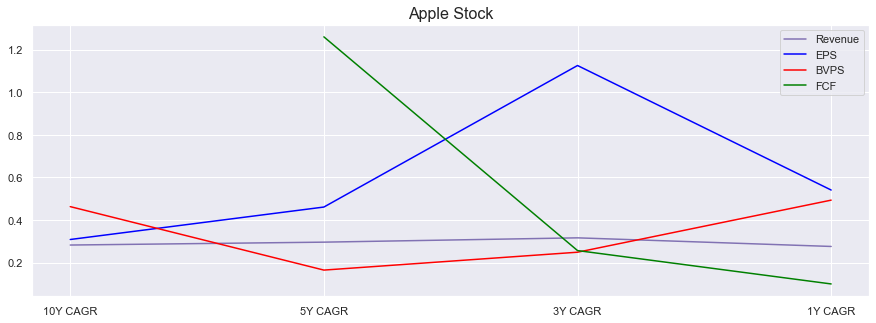

In [58]:
fig, ax = plt.subplots(figsize=[15,5])
ax.plot(NFLX.loc['Revenue'],label='Revenue',color='m')
ax.plot(NFLX.loc['EPS'],label='EPS',color='blue')
ax.plot(NFLX.loc['BVPS'],label='BVPS',color='red')
ax.plot(NFLX.loc['FCF'],label='FCF',color='green')
ax.set_title('Apple Stock',fontsize=16)
ax.legend()
plt.show()

In [59]:
# Create a DataFrame
# Method 1

NFLX_df = pd.DataFrame([NFLX.loc['Revenue'],NFLX.loc['EPS'],NFLX.loc['BVPS'],NFLX.loc['FCF']],index=['Revenue', 'EPS', 'BVPS','FCF'])
NFLX_df

,10Y CAGR,5Y CAGR,3Y CAGR,1Y CAGR
Revenue,0.282829,0.296371,0.316633,0.276181
EPS,0.308818,0.461207,1.125660,0.541045
BVPS,0.463197,0.165205,0.249168,0.493614
FCF,NaN,1.260207,0.256871,0.100171


In [60]:
#Method 2
NFLX2=NFLX.iloc[6:].unstack(1)

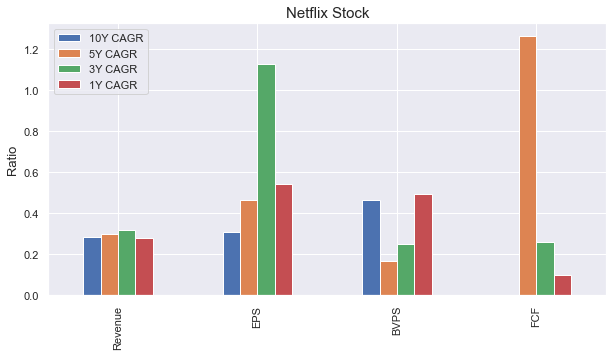

In [61]:
NFLX2.plot.bar(figsize=[10,5])
plt.title('Netflix Stock',fontsize=15)
plt.ylabel('Ratio',fontsize=13)
plt.show()

In [62]:
data.head(9)

DE                                    Current        ROI  \
      result_year result_mean result_max             results       Mean   
AAPL         True        True       True          Last 5Y OK  39.580667   
MSFT         True        True       True          Last 5Y OK  28.740465   
AMZN         True        True       True          Last 2Y OK  13.553953   
GOOG         True        True       True          Last 5Y OK  19.905789   
FB           True        True       True          Last 5Y OK  66.800714   
TSLA         True        True      False          Last 4Y OK -25.521463   
BRK.A        True        True       True  Not good to invest        NaN   
V            True        True       True          Last 5Y OK  29.584138   
JNJ          True        True       True          Last 5Y OK  20.860698   

                Revenue                                     EPS            \
      results  10Y CAGR   5Y CAGR   3Y CAGR   1Y CAGR  10Y CAGR   5Y CAGR   
AAPL     True  0.197500  0.073149  0.064581 -0.020411  0.249570  0.130280   
MSFT     True  0.079727  0.077033  0.113485  0.140295  0.120633  0.139827   
AMZN     True  0.276040  0.258135  0.272985  0.204541  0.274174       NaN   
GOOG     True  0.212071  0.196510  0.214860  0.183001  0.170196  0.190352   
FB       True  0.569994  0.414929  0.367618  0.266109  0.516426  0.423520   
TSLA    False  0.714482  0.503604  0.519904  0.145240 -0.047241  0.158312   
BRK.A   False  0.085116  0.055126  0.057805  0.027353  0.253736  0.327274   
V        True  0.127652  0.125860  0.150654  0.114901  0.250794  0.196406   
JNJ      True  0.028598  0.019979  0.045087  0.005859  0.024957 -0.002468   

                                BVPS                                     FCF  \
        3Y CAGR    1Y CAGR  10Y CAGR   5Y CAGR   3Y CAGR   1Y CAGR  10Y CAGR   
AAPL   0.126067  -0.003356  0.075461 -0.032367 -0.100551 -0.243615  0.206457   
MSFT   0.254980   1.375587  0.115237  0.053339  0.070346  0.174226  0.091656   
AMZN   0.674584   0.142502  0.277432  0.200590  0.263726  0.444376  0.243557   
GOOG   0.208543   0.124943       NaN  0.063947  0.067994  0.113328  0.137953   
FB     0.225919  -0.150594       NaN  0.108702  0.109959  0.254098  0.675028   
TSLA   0.013988  -0.140351  0.438404  0.243859  0.210013  1.329412       NaN   
BRK.A  0.503936  19.368098  0.073095  0.042052  0.054042  0.047488  0.076067   
V      0.287439   0.201005  0.095636  0.033184  0.034207  0.062607  0.471903   
JNJ   -0.017156   0.003565  0.016221 -0.005428 -0.023272  0.106643  0.049063   

                                       
        5Y CAGR   3Y CAGR     1Y CAGR  
AAPL   0.032706  0.032568   -0.081487  
MSFT   0.072066  0.152672    0.186283  
AMZN   0.676663  0.351304    0.331186  
GOOG   0.207503  0.059195    0.356517  
FB     0.310155  0.222257    0.381079  
TSLA        NaN       NaN -360.333333  
BRK.A  0.061805  0.048630   -0.006780  
V      0.125766  0.335381   -0.015954  
JNJ    0.033863  0.113144    0.066670

In [63]:
plt.rcParams.update({'font.size':3})

In [64]:
def plot(df,start=0,nrows=3,ncols=3):
    fig,ax = plt.subplots(nrows,ncols,figsize=[12,12],sharex=True, sharey=False)
    for i in range(nrows):
        for j in range(ncols):
            pos = start + j +i*ncols
            frame = df.iloc[pos][7:].copy()
            name = frame.name
            frame = frame.unstack(1)
            frame.plot.bar(ax=ax[i,j])
            ax[i,j].set_title(name)
            ax[i,j].axhline(0.1,color='red',alpha=0.3,linestyle='--')
            plt.tight_layout()

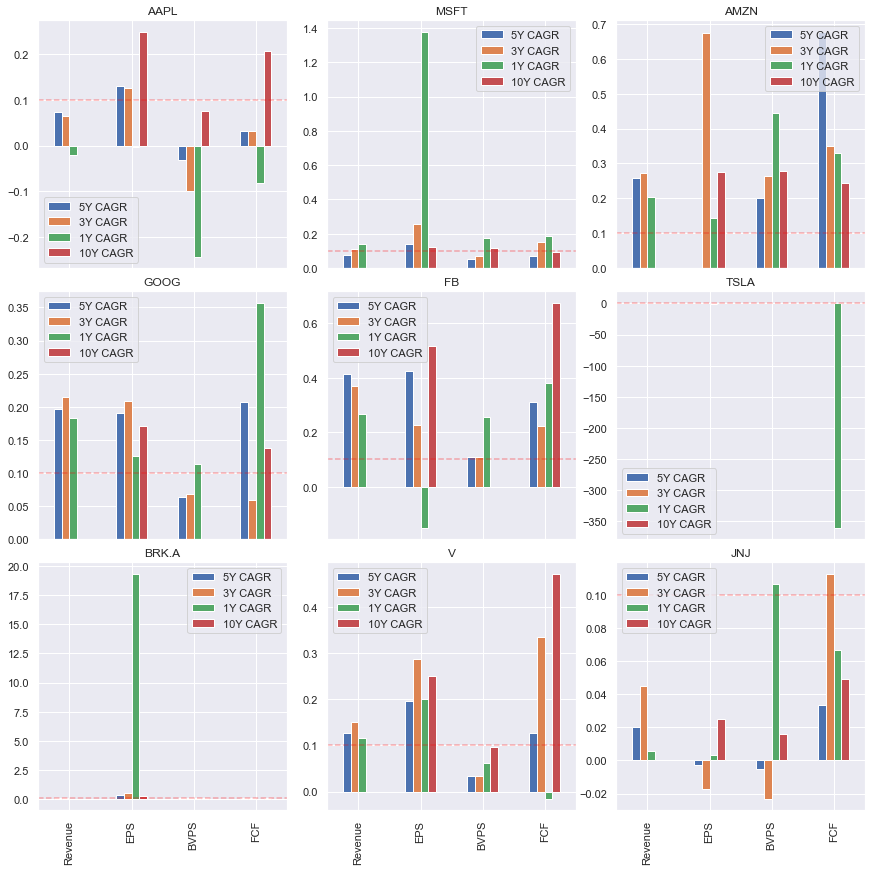

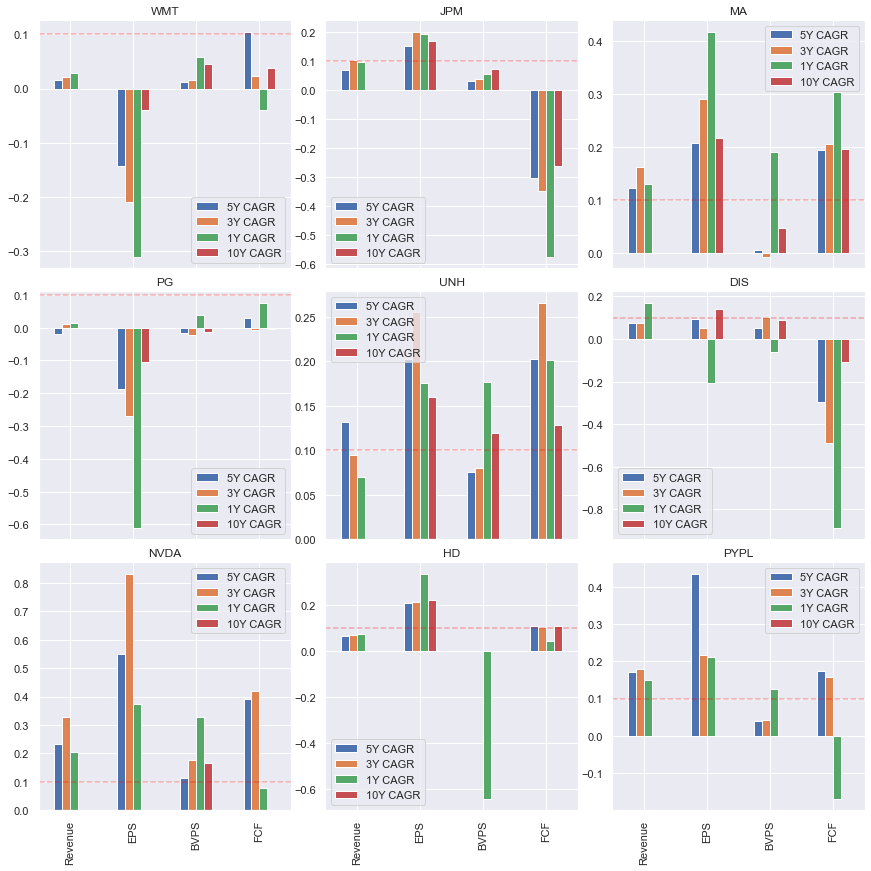

In [65]:
plot(data)
plot(data,start=9)
plt.tight_layout()

In [66]:
writer = pd.ExcelWriter('Results/data.xlsx',engine='xlsxwriter')
data.to_excel(writer,sheet_name='Main')

workbook = writer.book
worksheet = writer.sheets['Main']

#Create a format for a green cell
green_cell = workbook.add_format({
    'bg_color':'#C6EFCE',
    'font_color':'#006100'
})

# Create a format for red cell
red_cell = workbook.add_format({
    'bg_color':'#FFC7CE',
    'font_color':'#9C006'
})

# Create a conditional formatted of type formula
worksheet.conditional_format('B4:G53',{
    'type':'cell',
    'criteria':'=',
    'value': True,
    'format': green_cell
})
# Create a conditional formatted of type formula
worksheet.conditional_format('B4:G53',{
    'type':'cell',
    'criteria':'=',
    'value': False,
    'format': red_cell
})

# Create a conditional formatted of type formula
worksheet.conditional_format('F4:W53',{
    'type':'cell',
    'criteria':'>=',
    'value': 0.1,
    'format': green_cell
})
# Create a conditional formatted of type formula
worksheet.conditional_format('F4:W53',{
    'type':'cell',
    'criteria':'<=',
    'value': 0.1,
    'format': red_cell
})
writer.close()

In [67]:
ticker = "NFLX"

In [68]:
def read_annual_data(csv_file, ticker):
    data = pd.read_csv(csv_file, index_col=0)
    data = data[ticker]
    data['%-chg'] = data.pct_change()
    data = data.loc[2009:2019]
    return data

def read_quartely_data(csv_file, ticker):
    data = pd.read_csv(csv_file, index_col=0, parse_dates=True)
    data = data[ticker]
    data = data.resample('Y', convention='end').agg('mean')
    data['%-chg'] = data.pct_change()
    data = data.loc['2009-01-01':'2019-12-31']
    data.index = data.index.year
    return data

def read_quartely_ratio(csv_file, ticker):
    data = pd.read_csv(csv_file, index_col=0, parse_dates=True)
    data = data[ticker]
    data = data.resample('Y', convention='end').agg('mean')
    data = data.loc['2009-01-01':'2019-12-31']
    data.index = data.index.year
    return data

In [69]:
# Annual Data
rev = read_annual_data("PyFinance/04 - Intrinsic Value/50-rev.csv", ticker)
eps = read_annual_data("PyFinance/04 - Intrinsic Value/50-eps.csv", ticker)
fcf = read_annual_data("PyFinance/04 - Intrinsic Value/50-fcf.csv", ticker)

# Quarterly Data
bvps = read_quartely_data("PyFinance/04 - Intrinsic Value/50-bvps.csv", ticker)

# Ratio Data
roi = read_quartely_ratio("PyFinance/04 - Intrinsic Value/50-roi.csv", ticker)
de = read_quartely_ratio("PyFinance/04 - Intrinsic Value/50-de-ratio.csv", ticker)
pe = read_quartely_ratio("PyFinance/04 - Intrinsic Value/50-pe-ratio.csv", ticker)
current = read_quartely_ratio("PyFinance/04 - Intrinsic Value/50-current-ratio.csv", ticker)

In [70]:
def add_annual_data(writer, df, sheet_name):
    df.to_excel(writer, sheet_name=sheet_name)
    workbook = writer.book
    worksheet = writer.sheets[sheet_name]

    # Create a new chart object.
    chart = workbook.add_chart({'type': 'line'})

    # Add a series to the chart.
    chart.add_series({
        'name': sheet_name,
        'categories': [sheet_name, 1, 0, 11, 0],
        'values': [sheet_name, 1, 1, 11, 1],
    })
    
    # To set the labels on x axis not on 0 and rotate
    chart.set_x_axis({
        'label_position': 'low',
        'num_font':  {'rotation': 45}
    })


    # Insert the chart into the worksheet.
    worksheet.insert_chart('D1', chart)

In [71]:
writer = pd.ExcelWriter("Results/data2.xlsx", engine='xlsxwriter')

add_annual_data(writer, rev, "Revenue")
add_annual_data(writer, eps, "EPS")
add_annual_data(writer, fcf, "FCF")
add_annual_data(writer, bvps, "BVPS")
add_annual_data(writer, roi, "ROI")
add_annual_data(writer, de, "DE")
add_annual_data(writer, pe, "PE")
add_annual_data(writer, current, "Current")

writer.close()

In [72]:
def add_annual_data_2col(writer, df, sheet_name):
    df.to_excel(writer, sheet_name=sheet_name)
    workbook = writer.book
    worksheet = writer.sheets[sheet_name]

    # Create a new chart object.
    chart = workbook.add_chart({'type': 'line'})

    # Add a series to the chart.
    chart.add_series({
        'name': sheet_name,
        'categories': [sheet_name, 1, 0, 11, 0],
        'values': [sheet_name, 1, 1, 11, 1],
    })
    
    # Create a new column chart.
    column_chart = workbook.add_chart({'type': 'column'})
    
    # Add a series to the chart.
    column_chart.add_series({
        'name': "%-chg",
        'categories': [sheet_name, 1, 0, 11, 0],
        'values': [sheet_name, 1, 2, 11, 2],
        'y2_axis': True,
    })

    chart.combine(column_chart)
    chart.set_title({'name': sheet_name})
    chart.set_x_axis({'name': 'Date'})
    chart.set_y_axis({'name': 'Value'})
    column_chart.set_y2_axis({'name': '%-chg'})
    
    # To set the labels on x axis not on 0
    chart.set_x_axis({
        'label_position': 'low',
        'num_font':  {'rotation': 45}
    })


    # Insert the chart into the worksheet.
    worksheet.insert_chart('E1', chart)

In [73]:
writer = pd.ExcelWriter('Resultsdata4.xlsx', engine='xlsxwriter')

add_annual_data_2col(writer, rev, 'Revenue')
add_annual_data_2col(writer, eps, 'EPS')
add_annual_data_2col(writer, fcf, 'FCF')
add_annual_data_2col(writer, bvps, 'BVPS')

writer.close()